In [ ]:
##########################################
##### Install the relevant packages #####
##########################################
#This will take several minutes

if (!requireNamespace("BiocManager", quietly = TRUE)) #Install bioconductor, repository of bioinformatics packages in R
    install.packages("BiocManager")

BiocManager::install("edgeR"); #Install the EdgeR package

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'edgeR'”
Old packages: 'pbdZMQ', 'backports', 'broom', 'cli', 'crayon', 'generics',
  'openssl', 'sessioninfo', 'tzdb', 'usethis', 'uuid', 'nlme'



In [ ]:
install.packages("gplots");
install.packages("gplots2");

##########################################
##### Load the libraries #####
##########################################
library(edgeR);
library(gplots);
library(ggplot2);

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘gplots2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
##########################################
##### Read in the relevant datasets #####
##########################################
#Read in the peak predictions for motor cortex open chromatin

##### Download the matrix of predicted peaks #####

peakUrl <- "https://www.andrew.cmu.edu/user/apfennin/2021_Fall_GEB/project/Corces2020.MSN_D2.calibPeaks.avgCNN.predictions.txt.gz";
system(paste("wget ",peakUrl));



In [ ]:
peakPredM <- as.matrix(read.table(file = gzfile("Corces2020.MSN_D2.calibPeaks.avgCNN.predictions.txt.gz"), stringsAsFactors = F, header=T));

peaksM <- as.matrix(peakPredM[,c("Microcebus_murinus","Propithecus_coquereli","Eulemur_flavifrons","Homo_sapiens","Piliocolobus_tephrosceles","Nomascus_leucogenys")]);
rownames(peaksM) <- peakPredM[,c("name")];
peaksM[1:5,]

,Microcebus_murinus,Propithecus_coquereli,Eulemur_flavifrons,Homo_sapiens,Piliocolobus_tephrosceles,Nomascus_leucogenys
hg38:chr8:42005238-42005738:250,1.421096e-01,9.411927e-02,9.692722e-02,1.865368e-01,2.314851e-01,0.2020017231
hg38:chr8:42015658-42016158:250,NA,NA,NA,6.995182e-01,6.897648e-01,0.5755113328
hg38:chr8:42423796-42424296:250,NA,1.330901e-01,1.066593e-01,6.785862e-01,1.097863e-01,NA
hg38:chr8:42673983-42674483:250,NA,NA,NA,4.571948e-01,5.018241e-01,0.4375711292
hg38:chr3:166595421-166595921:250,2.138929e-02,1.066167e-01,1.516077e-01,4.921558e-01,2.548421e-01,0.5422840064


In [ ]:
# Record trait annotation in HashMap
install.packages('hash')
library(hash)
traitAnnotH = hash()
traitAnnotH[["Microcebus_murinus"]] <- 5;
traitAnnotH[["Propithecus_coquereli"]] <- 9.15;
traitAnnotH[["Eulemur_flavifrons"]] <- 1;
traitAnnotH[["Homo_sapiens"]] <- 5.75;
traitAnnotH[["Piliocolobus_tephrosceles"]] <- 4;
traitAnnotH[["Nomascus_leucogenys"]] <- 8.55

# put this in a data frame
traitAnnotF = data.frame(species = colnames(peaksM))
traitAnnotV = c()
for (species in traitAnnotF$species){
  traitAnnotV = append(traitAnnotV, traitAnnotH[[species]])
}
traitAnnotF$traitAnnot = traitAnnotV
traitAnnotF

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



species,traitAnnot
<chr>,<dbl>
Microcebus_murinus,5.00
Propithecus_coquereli,9.15
Eulemur_flavifrons,1.00
Homo_sapiens,5.75
Piliocolobus_tephrosceles,4.00
Nomascus_leucogenys,8.55


For each cell type, for each region of open chromatin, calculate the difference in open chromatin between/across the species of choice.

1. First, you need to calculate a significance value (p-value) that describes the extent to which each region is associated with the trait annotation.
2. Second, calculate a value that represents the magnitude and direction of the difference. This includes whether the open chromatin is predicted to be higher or lower when your trait varies. It also includes the extent to which it is different. This can be a difference in means across groups or the correlation between the trait and predicted open chromatin.

We used a correlation value between the trait and the predicted open chromatin. Specifically, it is the slope of the fitted linear regression line.

3. For each of those two measures (p-value and magnitude/direction) plot a histogram of the distribution of values. What do those histograms tell you about the statistical tests you conduct?

There are fewer significant p values than we expect by random chance. This means that there probably is a lot of noise in the data. There are slightly more genes that have expression levels that are positively correlated with social group size than those with expression levels that are negatively correlated with social group size because the middle of the slope histogram is shifted slightly to the right from 0. The same conclusion can be drawn from analyzing both D1 and D2 ATAC-seq data. It could suggest that differential expressions in D1 and D2 in the six chosen species have similar profiles.

4. Perform a p-value correction for multiple hypotheses. How many regions are significantly positively or significantly negatively associated at an adjusted p-value of <= 0.1? (It’s OK if there are none, sometimes we are statistically under-powered).

None.

In [ ]:
### Linear regression ---> pval ### #FIXME: ask about filtering
diffPvaluesV<- rep(NA,length(peaksM[,"Microcebus_murinus"]));
names(diffPvaluesV) <- row.names(peaksM); 
diffSlopeV <- diffPvaluesV

for(curPeak in row.names(peaksM)){
  curRow = as.double(peaksM[curPeak,])
  if(length(which(!is.na(curRow))) > 4 && sd(curRow,na.rm=T) > 10e-7) {
    newDfForPeak = data.frame(species = colnames(peaksM), POCValue = curRow, traitAnnot = traitAnnotF["traitAnnot"])
    lmpeak = lm(traitAnnot~POCValue, data = newDfForPeak)
    diffPvaluesV[curPeak] = summary(lmpeak)$coefficients["POCValue", "Pr(>|t|)"]
    diffSlopeV[curPeak] = summary(lmpeak)$coefficients["POCValue", "Estimate"]
  }
}

In [ ]:
diffResultsF <- data.frame(id=row.names(peaksM), slope=diffSlopeV, pvalue=diffPvaluesV, padj = p.adjust(diffPvaluesV))
diffResultsSortPadjF <- diffResultsF[order(diffResultsF$padj),]
diffResultsSortPvalueF <- diffResultsF[order(diffResultsF$pvalue),]
diffResultsSortPadjF[1:5,]
diffResultsSortPvalueF[1:5,]

,id,slope,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>
hg38:chr3:60378238-60378738:250,hg38:chr3:60378238-60378738:250,36.414666,8.887571e-06,0.3128691
hg38:chr8:42005238-42005738:250,hg38:chr8:42005238-42005738:250,4.955904,8.599516e-01,1.0000000
hg38:chr3:166595421-166595921:250,hg38:chr3:166595421-166595921:250,4.310352,5.580858e-01,1.0000000
hg38:chr3:166680958-166681458:250,hg38:chr3:166680958-166681458:250,6.992329,7.474380e-02,1.0000000
hg38:chr3:166695230-166695730:250,hg38:chr3:166695230-166695730:250,21.595149,1.057019e-01,1.0000000


,id,slope,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>
hg38:chr3:60378238-60378738:250,hg38:chr3:60378238-60378738:250,36.41467,8.887571e-06,0.3128691
hg38:chr3:1353142-1353642:250,hg38:chr3:1353142-1353642:250,13.48541,3.665687e-05,1.0000000
hg38:chr12:98947056-98947556:250,hg38:chr12:98947056-98947556:250,-89.22591,3.763250e-04,1.0000000
hg38:chr3:94181320-94181820:250,hg38:chr3:94181320-94181820:250,37.43561,5.371856e-04,1.0000000
hg38:chr1:36982348-36982848:250,hg38:chr1:36982348-36982848:250,-60.58927,5.601905e-04,1.0000000


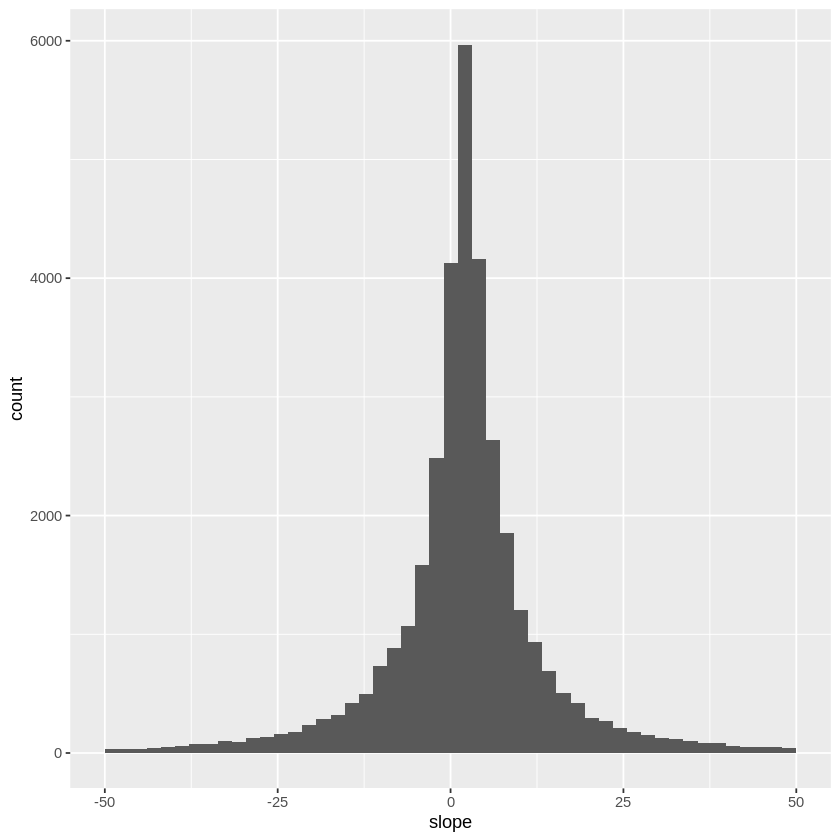

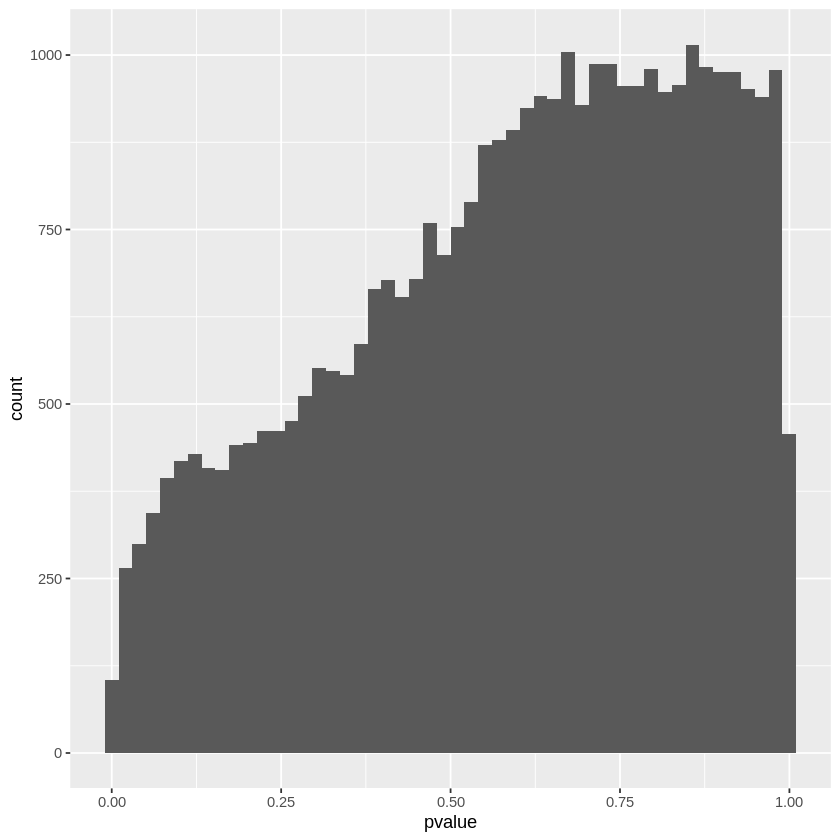

In [ ]:
ggplot(diffResultsF, aes(slope)) + geom_histogram(na.rm = TRUE, bins = 50) + xlim(-50, 50)
ggplot(diffResultsF, aes(pvalue)) + geom_histogram(na.rm = TRUE, bins = 50)

For each cell type, find the peak that is most positively and most negatively associated with the trait (based on un-adjusted p-value).

1. Create a barplot or scatter plot for those peak that show its association with the trait.

2. Visualize those peaks in the UCSC browser to find the some of the nearby genes. For each of those peaks, perform a literature search using pubmed for one of the nearby genes. What is the function of that gene and does it relate at all to the trait you are studying?

a. The peak that is most positively associated with the trait is in an intronic region of FHIT. FHIT participates in purine metabolism and is a tumor suppressor (https://www.ncbi.nlm.nih.gov/gene/2272). It has also been reported that FHIT deletion is found in a pediatric patient diagnosed with autism specturm disorders (https://www.karger.com/Article/FullText/512171). Regression of normal language and social skills started when the patient was 2 years old. Given the association between FHIT and social skills impairment, it is possible that FHIT plays a role in social behaviors, and hence contributes to social group size.

b. The peak that is most negatively associated with the trait is in an intron of ANKS1B. The protein ANKS1B encodes interacts with amyloid beta precursor protein and is implicated to play a role in schizophrenia, mood-disorders, obsessive-compulsive disorder, ADHD, autism spectrum disorders (ASD), and speech and motor deficits (https://www.nature.com/articles/s41467-019-11437-w). This suggests that ANKS1B is important for a wide range of neurodevelopmental processes. Because an abnormal copy number of ANKS1B is associated with ASD, which is characterized by social skills deficits, ANKS1B plays a role in social behaviors. Therefore, it may affect social group size. However, because it affects diverse neurological processes, even if it does affect social group size, the effect may not be specific or direct.


In [ ]:
mostPosPeak = "hg38:chr3:60378238-60378738:250"
mostNegPeak = "hg38:chr12:98947056-98947556:250"


 # set na to 0
mostPosAndNegPeaksF <- data.frame(PosPeak = as.double(peaksM[which(row.names(peaksM) == mostPosPeak),]),
                    NegPeak = as.double(peaksM[which(row.names(peaksM) == mostNegPeak),]))
mostPosAndNegPeaksF[is.na(mostPosAndNegPeaksF)] = 0
mostPosAndNegPeaksF$species = colnames(peaksM)
mostPosAndNegPeaksF <- merge(mostPosAndNegPeaksF,traitAnnotF,by="species")

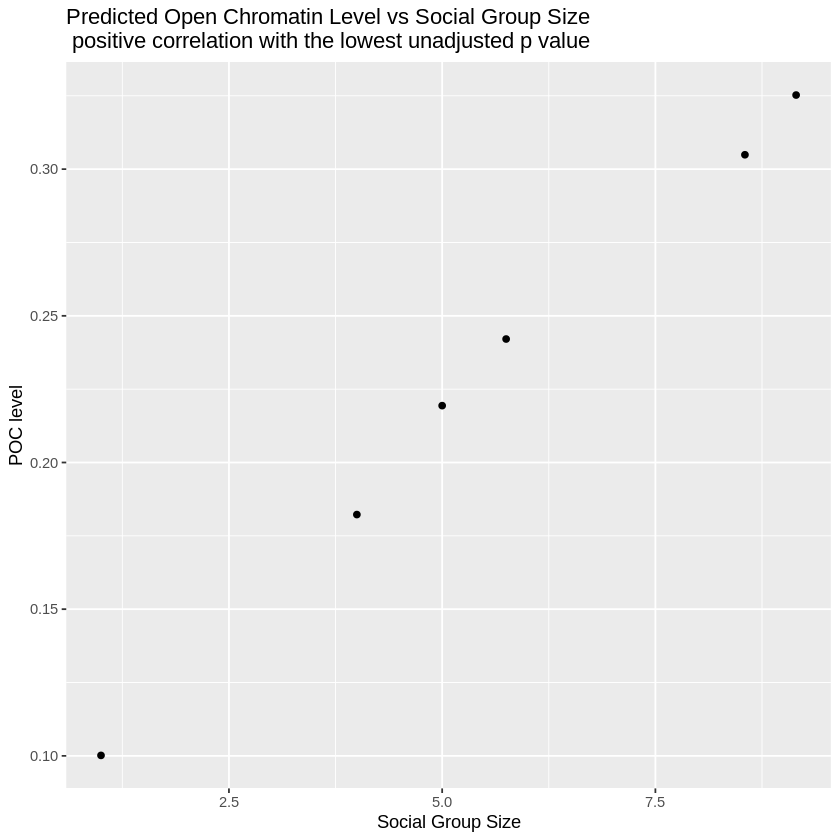

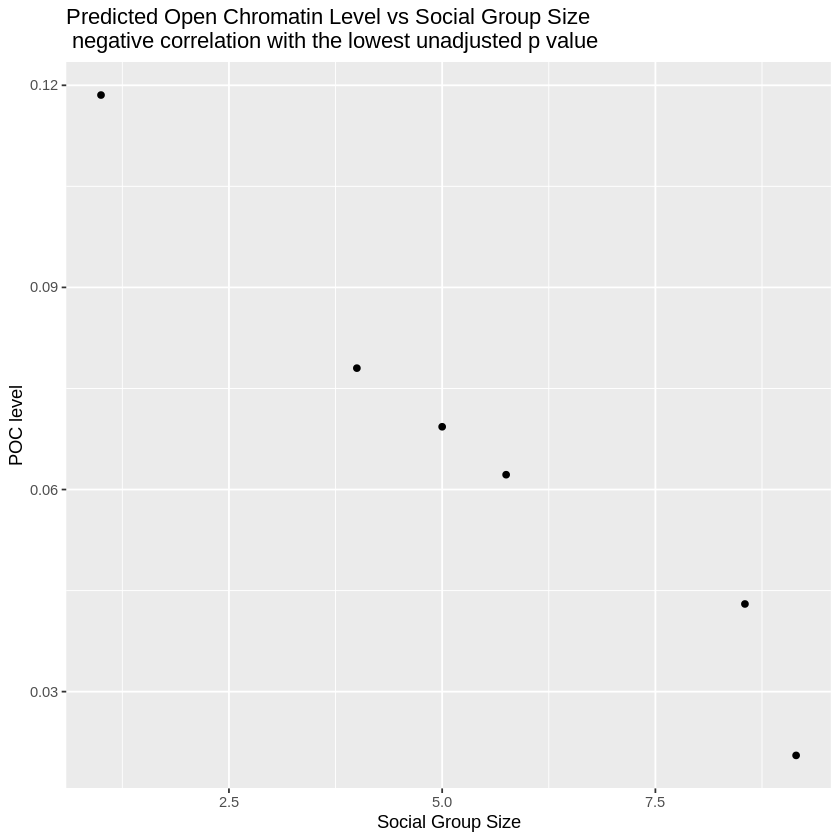

In [ ]:
ggplot(data = mostPosAndNegPeaksF, aes(x = traitAnnot, y = PosPeak)) + geom_point() + ggtitle("Predicted Open Chromatin Level vs Social Group Size \n positive correlation with the lowest unadjusted p value") +
  xlab("Social Group Size") + ylab("POC level")
ggplot(data= mostPosAndNegPeaksF, aes(x = traitAnnot, y = NegPeak)) + geom_point() + ggtitle("Predicted Open Chromatin Level vs Social Group Size \n negative correlation with the lowest unadjusted p value") +
  xlab("Social Group Size") + ylab("POC level")

In [ ]:
mostPosAndNegPeaksF

species,PosPeak,NegPeak,traitAnnot
<chr>,<dbl>,<dbl>,<dbl>
Eulemur_flavifrons,0.1001606,0.11855050,1.00
Homo_sapiens,0.2420894,0.06220019,5.75
Microcebus_murinus,0.2193812,0.06931578,5.00
Nomascus_leucogenys,0.3048958,0.04301258,8.55
Piliocolobus_tephrosceles,0.1822504,0.07801615,4.00
Propithecus_coquereli,0.3252534,0.02053840,9.15


In [ ]:
slope_bottom = diffResultsSortPvalueF[diffResultsSortPvalueF$slope<0,] # negatively correlated
bottom_200_slope = slope_bottom[1:200,]

slope_top = diffResultsSortPvalueF[diffResultsSortPvalueF$slope>0,] # positively correlated
top_200_slope = slope_top[1:200,]

write.table(bottom_200_slope,file="slope_bottomD2.txt",quote=F,sep="\t",row.names=F,col.names=F);
write.table(top_200_slope,file="slope_topD2.txt",quote=F,sep="\t",row.names=F,col.names=F);
write.table(peakPredM,file="all_peaksD2.txt",quote=F,sep="\t",row.names=F,col.names=F);
top_200_slope

,id,slope,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>
hg38:chr3:60378238-60378738:250,hg38:chr3:60378238-60378738:250,36.41467,8.887571e-06,0.3128691
hg38:chr3:1353142-1353642:250,hg38:chr3:1353142-1353642:250,13.48541,3.665687e-05,1.0000000
hg38:chr3:94181320-94181820:250,hg38:chr3:94181320-94181820:250,37.43561,5.371856e-04,1.0000000
hg38:chr16:18728545-18729045:250,hg38:chr16:18728545-18729045:250,18.97691,6.410832e-04,1.0000000
hg38:chr2:62138999-62139499:250,hg38:chr2:62138999-62139499:250,39.46235,6.920866e-04,1.0000000
hg38:chr22:27767410-27767910:250,hg38:chr22:27767410-27767910:250,188.23436,8.308651e-04,1.0000000
hg38:chr2:45790215-45790715:250,hg38:chr2:45790215-45790715:250,33.35734,8.736068e-04,1.0000000
hg38:chr5:167694138-167694638:250,hg38:chr5:167694138-167694638:250,16.72516,9.655009e-04,1.0000000
hg38:chr3:43995564-43996064:250,hg38:chr3:43995564-43996064:250,21.27237,1.180151e-03,1.0000000


In [2]:
### See Python main.py for further analysis and generation of .bed files ###

**200 Positively Correlated:**

**Whole Genome** -
No process was significant when the positively correlated peaks were compared to whole genome.

**All Relative Peaks** -
There were no results for the relative peaks compared to the top positively coorelated peaks.

''''''''''''''''''

**200 Negatively Correlated:** 

**Whole Genome**-
For negatively correlated peaks, there was no results.

**All Relative Peaks** -
For negatively correlated peaks, there was also no results.



**Conclusion:**
For the p-values calculated and the top positive and negative correlated peaks, there is no region of significance.